In [2]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

# Uncertain Qubits

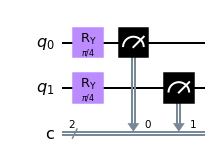

In [7]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw(output="mpl")

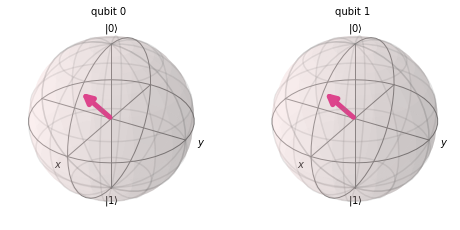

In [8]:
plot_bloch_multivector(orig_statevec)

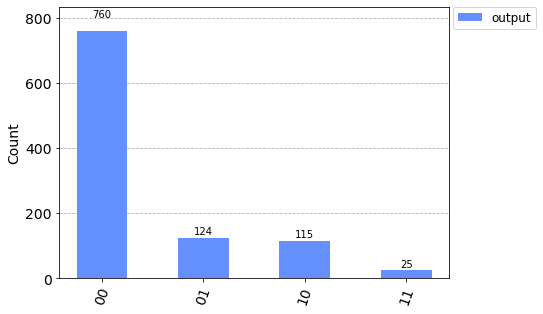

In [9]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

# Hadamards in front of uncertain qubits

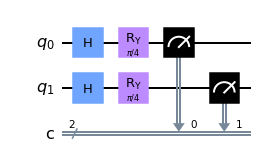

In [10]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw(output="mpl")

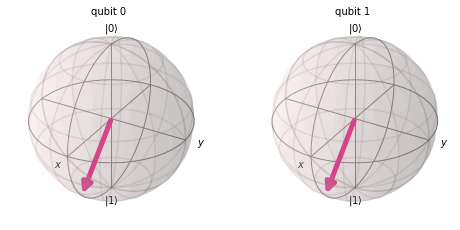

In [11]:
plot_bloch_multivector(statevec)

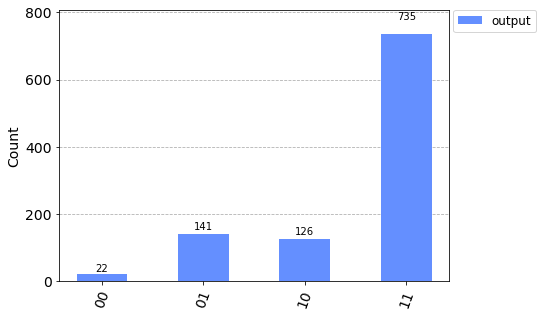

In [15]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

# Hadamard 'Sandwich' of uncertain qubits

In [16]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1])
c.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├┤M├───
     ├───┤├─────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├─╫─┤M├
     └───┘└─────────┘└───┘ ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [ ]:
#.....